# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/breast_cancer.csv')
X = Xy.drop(['diagnosis'], axis=1)
y = Xy['diagnosis']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
nb_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
nb_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
nb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.6578947368421053, 0.6403508771929824, 0.38596491228070173, 0.40350877192982454, 0.6754385964912281, 0.6140350877192983, 0.6403508771929824, 0.3157894736842105, 0.6140350877192983, 0.5877192982456141, 0.6491228070175439, 0.5964912280701754, 0.631578947368421, 0.4649122807017544, 0.6666666666666666, 0.34210526315789475, 0.41228070175438597, 0.43859649122807015, 0.6578947368421053, 0.7192982456140351]

Accuracy:
0.5557017543859649

Standard Deviation:
0.12455754256432854

Confusion Matrix:
    B  M
B  75  0
M  39  0
    B  M
B  73  0
M  41  0
    M  B
M  44  0
B  70  0
   B   M
B  0  68
M  0  46
    B  M
B  77  0
M  37  0
    B  M
B  70  0
M  44  0
    B  M
B  73  0
M  41  0
   B   M
B  0  78
M  0  36
    B  M
B  70  0
M  44  0
   M   B
M  0  47
B  0  67
   M   B
M  0  40
B  0  74
   M   B
M  0  46
B  0  68
   M   B
M  0  42
B  0  72
   B   M
B  0  61
M  0  53
    B  M
B  76  0
M  38  0
    M  B
M  39  0
B  75  0
   B   M
B  0  67

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,B,M
B,47,24
M,26,15


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.6578947368421053, 0.6403508771929824, 0.6140350877192983, 0.40350877192982454, 0.6754385964912281, 0.6140350877192983, 0.6403508771929824, 0.3157894736842105, 0.6140350877192983, 0.41228070175438597, 0.6491228070175439, 0.5964912280701754, 0.631578947368421, 0.4649122807017544, 0.6666666666666666, 0.34210526315789475, 0.41228070175438597, 0.5614035087719298, 0.34210526315789475, 0.2807017543859649]

Accuracy:
0.5267543859649123

Standard Deviation:
0.13379637395303123

Confusion Matrix:
    B  M
B  75  0
M  39  0
    B  M
B  73  0
M  41  0
   M   B
M  0  44
B  0  70
   B   M
B  0  68
M  0  46
    B  M
B  77  0
M  37  0
    B  M
B  70  0
M  44  0
    B  M
B  73  0
M  41  0
   B   M
B  0  78
M  0  36
    B  M
B  70  0
M  44  0
    M  B
M  47  0
B  67  0
   M   B
M  0  40
B  0  74
   M   B
M  0  46
B  0  68
   M   B
M  0  42
B  0  72
   B   M
B  0  61
M  0  53
    B  M
B  76  0
M  38  0
    M  B
M  39  0
B  75  0
   B   M
B  0  67

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,B,M
B,43,28
M,25,16


# Showing naive bayes informations computed

In [8]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[0.34210526315789475, 0.35964912280701755, 0.38596491228070173, 0.5964912280701754, 0.32456140350877194, 0.38596491228070173, 0.35964912280701755, 0.6842105263157895, 0.38596491228070173, 0.5877192982456141, 0.3508771929824561, 0.40350877192982454, 0.3684210526315789, 0.5350877192982456, 0.3333333333333333, 0.6578947368421053, 0.5877192982456141, 0.43859649122807015, 0.6578947368421053, 0.7192982456140351]

Accuracy:
0.4732456140350877

Standard Deviation:
0.13379637395303126

Confusion Matrix:
   B   M
B  0  75
M  0  39
   B   M
B  0  73
M  0  41
    M  B
M  44  0
B  70  0
    B  M
B  68  0
M  46  0
   B   M
B  0  77
M  0  37
   B   M
B  0  70
M  0  44
   B   M
B  0  73
M  0  41
    B  M
B  78  0
M  36  0
   B   M
B  0  70
M  0  44
   M   B
M  0  47
B  0  67
    M  B
M  40  0
B  74  0
    M  B
M  46  0
B  68  0
    M  B
M  42  0
B  72  0
    B  M
B  61  0
M  53  0
   B   M
B  0  76
M  0  38
   M   B
M  0  39
B  0  75
    

In [9]:
confusion_matrix_mean(nb_confusion_matrix_list)

,B,M
B,28,43
M,16,25


# Choosing two columns from the last X_train and X_test to plot decision surface

In [12]:
X_train_2d, X_test_2d = X_train[['radius_mean', 'texture_mean']], X_test[['radius_mean', 'texture_mean']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     radius_mean  texture_mean
141        16.11         18.05
481        13.90         19.24
189        12.30         15.90
124        13.37         16.39
453        14.53         13.98
..           ...           ...
54         15.10         22.02
219        19.53         32.47
25         17.14         16.40
429        12.72         17.67
247        12.89         14.11

[455 rows x 2 columns]
Test dataset:
     radius_mean  texture_mean
509       15.460         23.95
490       12.250         22.44
203       13.810         23.75
104       10.490         19.29
270       14.290         16.82
..           ...           ...
552       12.770         29.43
101        6.981         13.43
123       14.500         10.89
476       14.200         20.53
286       11.940         20.76

[114 rows x 2 columns]


# Training the models with the new dataset 2d

In [13]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

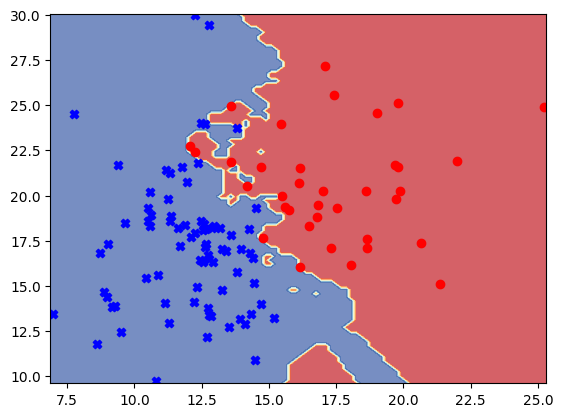

In [15]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

M = np.where(knn_y_pred == 'M')
B = np.where(knn_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting dmc decision surface

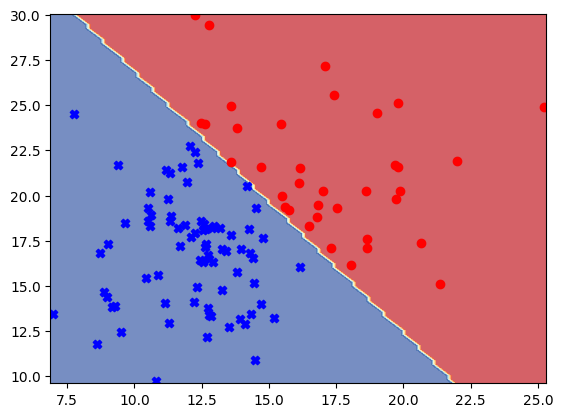

In [17]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

M = np.where(dmc_y_pred == 'M')
B = np.where(dmc_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()

# Plotting naive bayes decision surface

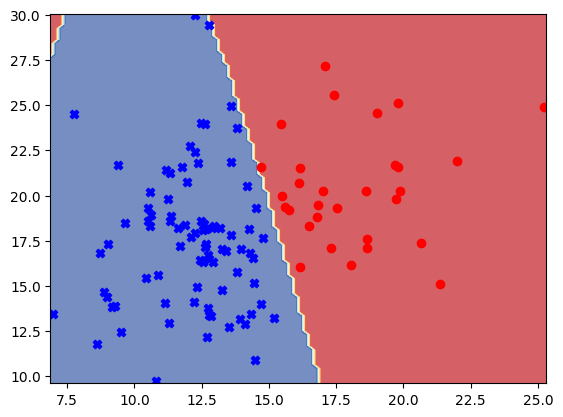

In [18]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]
for i, y in enumerate(y_pred[0]):
    if y == 'M':
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = 2

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

M = np.where(nb_y_pred == 'M')
B = np.where(nb_y_pred == 'B')

plt.scatter(data[M, 0], data[M, 1],
            color='red', marker='o', label='M')
plt.scatter(data[B, 0], data[B, 1],
            color='blue', marker='X', label='B')

plt.show()